<a href="https://colab.research.google.com/github/waltz2u/web/blob/master/Web_programming_with_Flask_and_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web programming with Flask and Bootstrap

This exercise is for a local computer, in which you have Anaconda installed. To start, install Flask (pip install Flask). Note that though you can run the application in Jupyter Notebook like in the code chunk below but it is unstable. Instead save the Python code in app.py, then in Anaconda Prompt, run:

python app.py

Then take the link shown there to the web browser

In [1]:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World! It's me"

if __name__ == '__main__':
    app.run(port=4001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4001/ (Press CTRL+C to quit)


To make the web interface look nice, Bootstrap can be used, which is a free and open-source front-end framework for designing websites and web applications. It contains HTML- and CSS-based design templates for typography, forms, buttons, navigation and other interface components, as well as optional JavaScript extensions.

Now let's try another example. In the directory that you have the py files, create a sub-directory namely "templates". Then create an html file namely "transaction.html"

In the <head> tag of the template file, include the following that specifies Javascript and CSS in Bootstrap CDN (remotely hosted) so you don't have to download or set up anything:

In [0]:
<head> 

    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">

	<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap-theme.min.css" integrity="sha384-rHyoN1iRsVXV4nD0JutlnGaslCJuC7uwjduW9SVrLvRYooPp2bWYgmgJQIXwl/Sp" crossorigin="anonymous">

	<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" crossorigin="anonymous"></script>
        
</head>

This is a typical html submit form. 

Regarding web programming, only look at html elements such as inputs, that play a roles like variables and carry data to send to another URL specified in the action attribute of the form tag (in this case http://localhost:5000/result), the method of the form (like GET or POST). If data is sent using GET, you can see data on the address bar of the web browser.

Example: If in the form, fill in

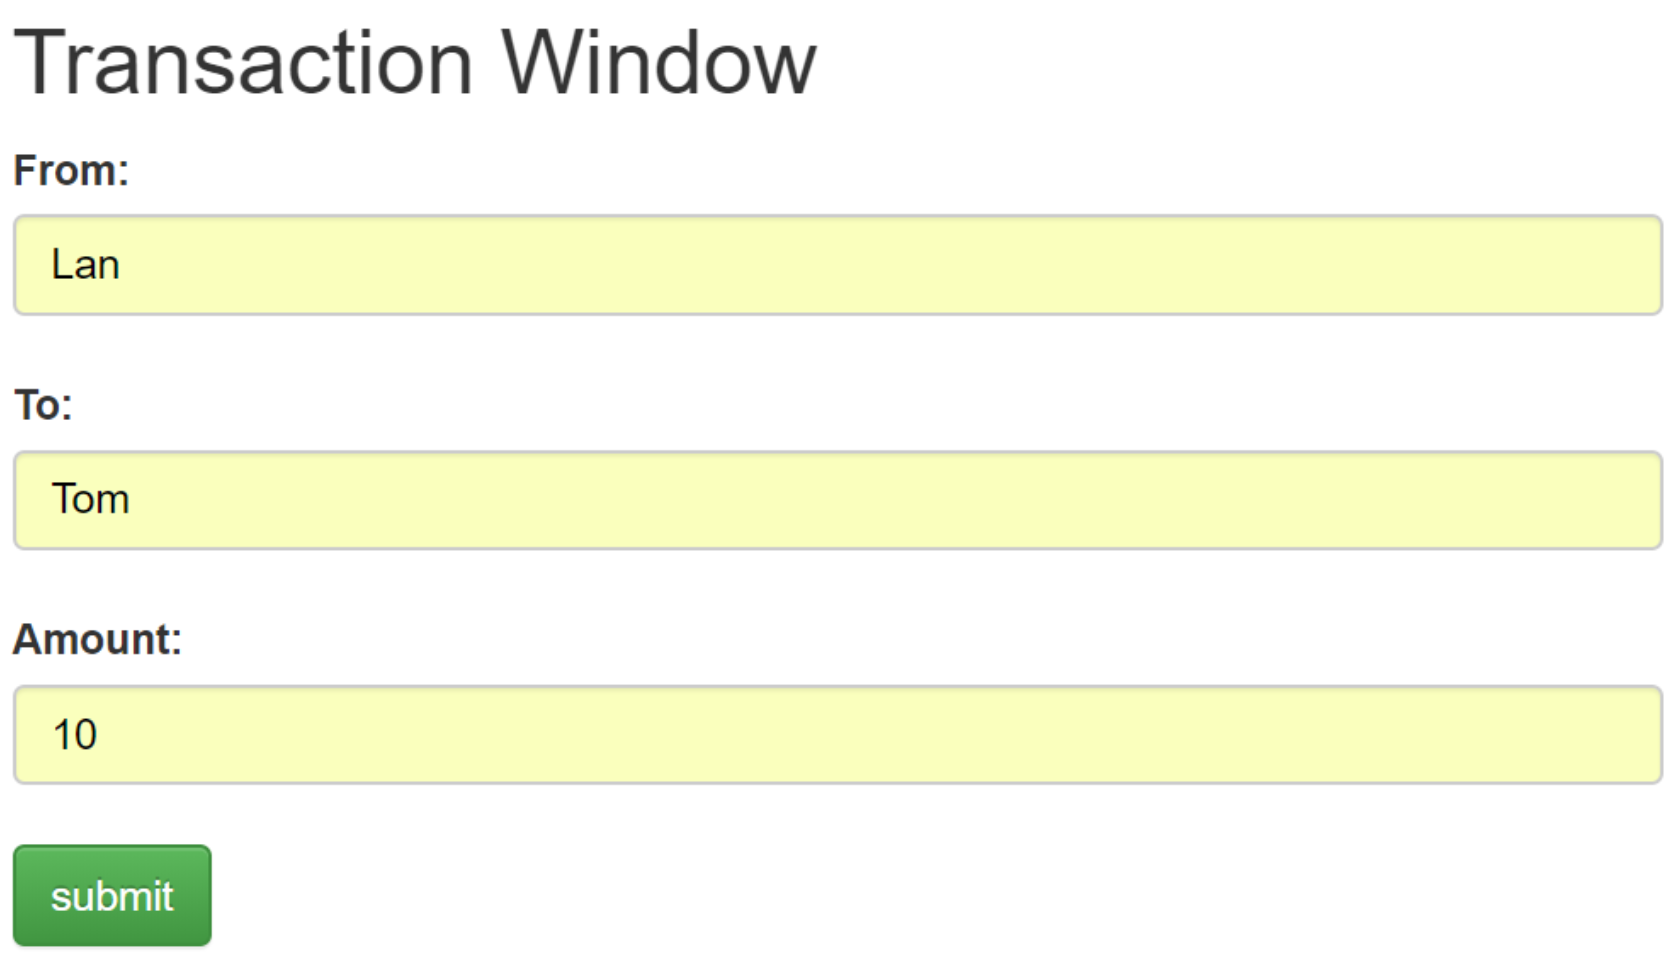

When submitting, the page sends a GET request to the Flask server. The address bar of the web browser will show something like
http://localhost:5000/result?from=Lan&to=Tom&Amount=10
where you can see variables and values go in pair, passed to the page at this URL. 

However you don't see the variables on the address bar if you send a POST request. There are ways to see them using browser tools (not covered here)

To learn more about forms
https://www.w3schools.com/html/html_forms.asp

and form elements:
https://www.w3schools.com/html/html_form_elements.asp

There are live examples so you can try and learn. In general to learn html, start from
https://www.w3schools.com/html/default.asp

Here is the content of the transaction.html file, which shows the transaction window.

In [0]:
<div class="container" role="form">
    <h2>Transaction Window</h2>
    <form action = "http://localhost:5000/result" method = "POST">
        <div class="form-group">
            <div class="row">
                <div class="col-xs-6">   
                    <label for="From">From:</label><br/>
                    <input type = "text" name = "from" class="form-control" placeholder="Enter the payer's name"/><br/>
                </div>
            </div>
            <div class="row">
                <div class="col-xs-6"> 
                    <label for="To">To:</label><br/>
                    <input type = "text" name = "to" class="form-control" placeholder="Enter the payee's name"/><br/>

                </div>
            </div>
            <div class="row">
                <div class="col-xs-6"> 
                    <label for="mount">Amount:</label><br/>
                    <input type = "text" name = "amount" class="form-control" placeholder="Enter the amount to pay"/><br/>
                    <input type = "submit" value = "submit" class="btn btn-success"/><br/>
                </div>
            </div>
        </div>
    </form>
</div>

An html form could use the following classes for html elements to make them look nicer. A div (for "division") is to divide the layout in different parts. The class="col-xs-6" means the div take half the width of the screen as the total width is 12. The class="btn btn-success" for the submit button applies the corresponding button green theme to the button. The placeholder="Enter the amount to pay" is to show the placeholder on the input control if there is no data yet.

For form layout, see:
https://getbootstrap.com/docs/4.0/layout/grid/

For form components, see:
https://getbootstrap.com/docs/4.0/components/forms/

For button settings, see:
https://getbootstrap.com/docs/4.0/components/buttons/

For Bootstrap in general, check:
https://getbootstrap.com/docs/4.0/getting-started/introduction/ 

Here is the Python code

In [0]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def index():
    return render_template('transaction.html')


@app.route('/result', methods=['POST'])
def transaction():
    if request.method == 'POST':
        result = request.form
        return render_template("transaction.html",result = result)
    
if __name__ == '__main__':
    app.run(port=4001)    

The route() decorator in Flask is used to bind URL to a function. Here, URL '/' rule is bound to the index() function. In the example above, a route is created for "/". If you browse to the root of the website, like http://localhost:5000/, you will see the transaction window and form. On submission, the variables on the form (To, From, Amount) are passed to the same transaction.html at "/result" route. Here we check if the method is POST, if it is, get the submitted variables via

result = request.form

then show the variables on the page using {{ variable }}. Code is embedded in html between {%  and %}

In the html code below, result was passed from the transaction() function.

See more here
http://flask.pocoo.org/docs/1.0/tutorial/templates/


In [0]:
<div class="row">
    {% if result %}	
    <div class="alert alert-info col-xs-6">
    <strong>The transaction was successful 						
        {% for key, value in result.items() %}		
            {{key}}: {{value}};  
        {% endfor %}
    </strong>
    </div>
    {% endif %}
</div>